# linear regression

In [1]:
!pip install pandas

In [2]:
!pip install gspread

In [3]:
import pandas as pd
import gspread as gs

In [4]:
gs1= gs.service_account('C:\\Users\\tahsi\\Downloads\\siraj-ds-assignment-class4-fd2d0e97c71c.json')

In [5]:
gs1

In [6]:
sh1=gs1.open_by_url("https://docs.google.com/spreadsheets/d/16mgA456E8j6E5LIEUAtVYjCjmLtOFnJIufjPn1A_0ag/edit?usp=sharing")

In [8]:
sh1

<Spreadsheet 'Height-Weight Data' id:16mgA456E8j6E5LIEUAtVYjCjmLtOFnJIufjPn1A_0ag>

In [10]:
ws1=sh1.worksheet('Height-Weight Data')

In [11]:
ws1

<Worksheet 'Height-Weight Data' id:702851793>

In [12]:
df=pd.DataFrame(ws1.get_all_records()) #imported data from google spreadsheet

In [14]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [16]:
import numpy as nmp
from matplotlib import pyplot as pplot

In [17]:
df.head() #the whole view

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [19]:
df.shape #3501 rows and 2 columns 

(3501, 2)

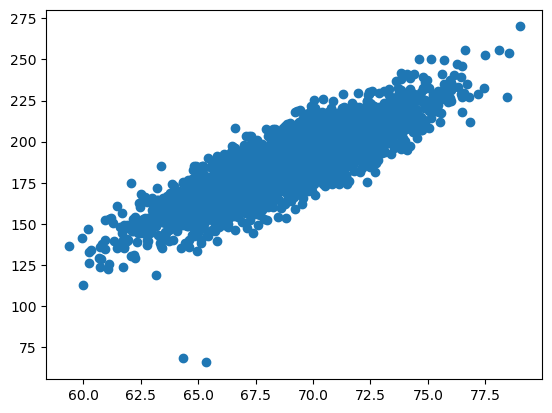

In [20]:
pplot.scatter(df.Height, df.Weight)  #in x axis set height and y axis we set weight

Text(0.5, 1.0, 'height and weight chart for normal humans')

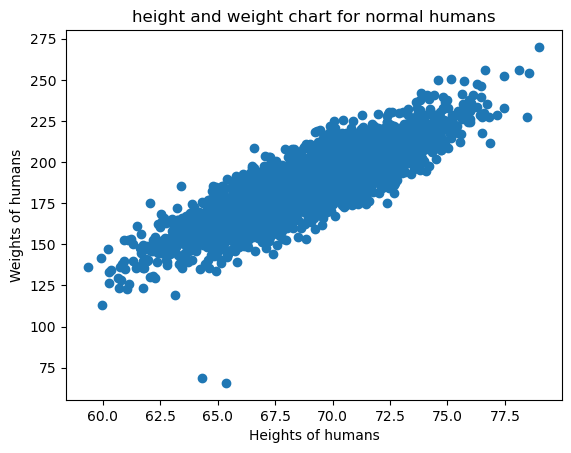

In [22]:
pplot.scatter(df.Height, df.Weight)  
pplot.xlabel('Heights of humans')   #labeled x y and title
pplot.ylabel('Weights of humans')
pplot.title('height and weight chart for normal humans')

In [25]:
x=df.drop('Weight',axis=1)  #separated the columns using drop function and here axid 1 means column, axis 0 would have meant row
y=df[['Weight']]

In [26]:
x.head()  #whole view of x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [27]:
x.shape 

(3501, 1)

In [28]:
y.head()  #whole view of y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [29]:
y.shape

(3501, 1)

In [30]:
x.mean()  #mean values or average values of x and y

Height    69.024411
dtype: float64

In [31]:
y.mean()

Weight    186.891258
dtype: float64

In [32]:
from sklearn.model_selection import train_test_split  

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size= 0.30, random_state=1) #kept 30 percent of the whole data as testing data using traintestsplit fucntion

In [36]:
xtrain.head()  #whole view of training data

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [37]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [38]:
ytrain.head()

,Weight
221,165.431242
2696,185.348211
1334,179.352182
3402,197.476930
1159,200.286509


In [39]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr1=LinearRegression()

In [42]:
lr1.fit(xtrain,ytrain)  #trained the model by 70 percent of the whole data that we have assigned as training data

LinearRegression()

In [44]:
m=lr1.coef_  #determined co efficient of the  training data
m

array([[5.97744946]])

In [45]:
c=lr1.intercept_  #determined intercept of the training data
c

array([-225.82603001])

In [46]:
lr1.predict(x)  #predicted the values of y for corresponding all data of x (x.head())

array([[215.59078213],
       [185.31432533],
       [217.16337956],
       ...,
       [215.98249712],
       [177.03027812],
       [208.96748706]])

In [47]:
df['predicted weights for particular heights']=lr1.predict(x) #assigned another column which depicts the values of predicted weights for particular heights
df.head()

,Height,Weight,predicted weights for particular heights
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873


In [48]:
df.shape #now, the shape has changed as the column number increased from two to three

(3501, 3)

In [55]:
z=df[['predicted weights for particular heights']]  #assigned the new column we have created to z 

In [56]:
z.head()

,predicted weights for particular heights
0,215.590782
1,185.314325
2,217.163380
3,202.942268
4,191.888873


Text(0, 0.5, 'predicted y')

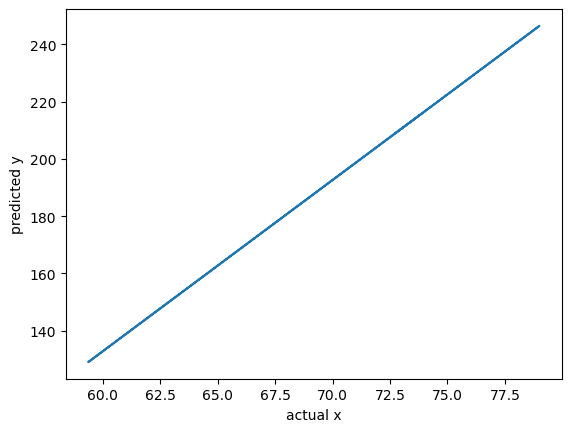

In [58]:
pplot.plot(x,z) #plotted x vs predicted y and then labeled
pplot.xlabel('actual x')
pplot.ylabel('predicted y')

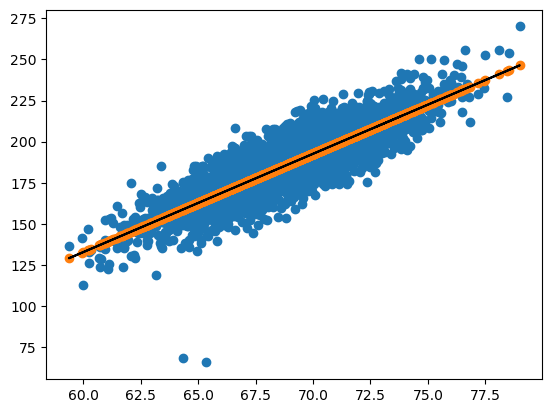

In [62]:
pplot.plot(x,z,color='black')  #comparison between x vs predicted y and x vs actual y
pplot.scatter(x,y)
pplot.scatter(x,z)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
mse= mean_squared_error(ytest, lr1.predict(xtest))  #imported the fucntion mse and mae for evaluating the values 
mae= mean_absolute_error(ytest, lr1.predict(xtest))

In [65]:
mse

110.89221516932378

In [66]:
mae

8.279688660993672

In [67]:
lr1.score(xtest,ytest) #here score signifies the accuracy of the model which is nearly 73 percent, a decent one

0.7313258168853622

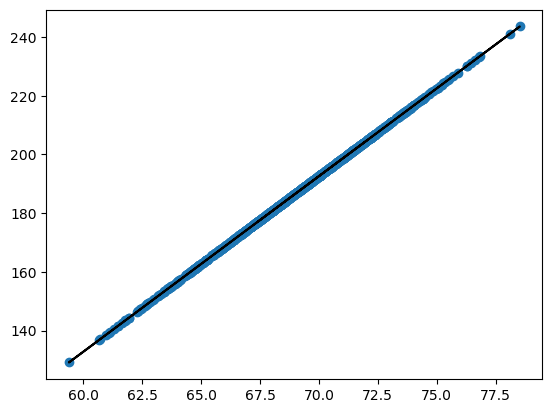

In [71]:
pplot.plot(xtest, lr1.predict(xtest), color='black') #plotted actual test values of x vs predicted test values of x from the calculation we have got from training values
pplot.scatter(xtest, lr1.predict(xtest))


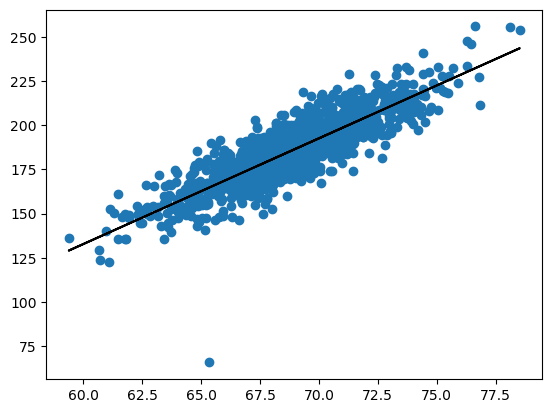

In [73]:
pplot.scatter(xtest,ytest)  #plotted actual test values of x vs actual test values of y
pplot.plot(xtest, lr1.predict(xtest), color='black')

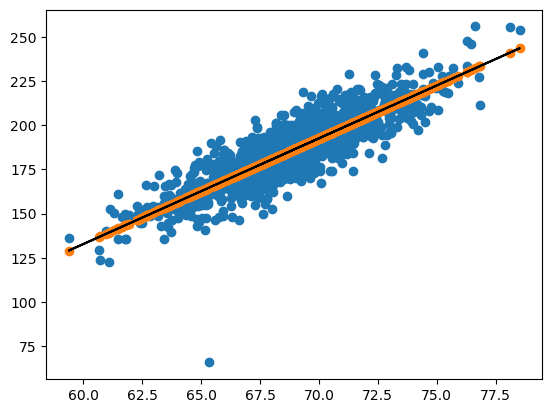

In [74]:
pplot.plot(xtest, lr1.predict(xtest), color='black')  #overall comparison
pplot.scatter(xtest,ytest) 
pplot.scatter(xtest, lr1.predict(xtest))
